In [1]:
import tensorflow as tf
from keras.preprocessing import image_dataset_from_directory
from keras import layers, models
import os

In [2]:
foldername = 'datasets'
train_dataset = image_dataset_from_directory(
    foldername,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    foldername,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

Found 860 files belonging to 86 classes.
Using 688 files for training.
Found 860 files belonging to 86 classes.
Using 172 files for validation.


In [83]:
class_names = train_dataset.class_names
class_names

['Acetaminophen',
 'Acyclovir',
 'Alprazolam',
 'Amlodipine',
 'Amoxicillin',
 'Aripiprazole',
 'Aspirin',
 'Atenolol',
 'Atorvastatin',
 'Azithromycin',
 'Bupropion',
 'Calcium Carbonate',
 'Canagliflozin',
 'Celecoxib',
 'Cephalexin',
 'Chloroquine',
 'Chondroitin',
 'Ciprofloxacin',
 'Citalopram',
 'Clindamycin',
 'Clonazepam',
 'Clopidogrel',
 'Clotrimazole',
 'Dabigatran',
 'Dapagliflozin',
 'Diazepam',
 'Diclofenac',
 'Doxycycline',
 'Escitalopram',
 'Fentanyl',
 'Ferrous Sulfate',
 'Fluconazole',
 'Fluoxetine',
 'Folic Acid',
 'Gabapentin',
 'Glipizide',
 'Glucosamine',
 'Glyburide',
 'Hydrochlorothiazide',
 'Hydrocodone',
 'Hydroxychloroquine',
 'Ibuprofen',
 'Insulin',
 'Ketoconazole',
 'Lactobacillus',
 'Levofloxacin',
 'Levothyroxine',
 'Liraglutide',
 'Lisinopril',
 'Lithium',
 'Losartan',
 'Meloxicam',
 'Metformin',
 'Metoprolol',
 'Metronidazole',
 'Miconazole',
 'Morphine',
 'Naproxen',
 'Nifedipine',
 'Nitroglycerin',
 'Olanzapine',
 'Omega-3 Fatty Acids',
 'Oseltamivir

In [4]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal', input_shape=(180, 180, 3)), 
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [5]:
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [101]:
model = models.load_model("./model/medicine_classifier.h5")

In [102]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5
)

Epoch 1/5
22/22 [==============================] - 17s 717ms/step - loss: 0.0978 - accuracy: 0.9680 - val_loss: 27.8053 - val_accuracy: 0.0233
Epoch 2/5
22/22 [==============================] - 20s 917ms/step - loss: 0.1385 - accuracy: 0.9608 - val_loss: 26.3644 - val_accuracy: 0.0349
Epoch 3/5
22/22 [==============================] - 17s 765ms/step - loss: 0.0987 - accuracy: 0.9680 - val_loss: 26.5868 - val_accuracy: 0.0174
Epoch 4/5
22/22 [==============================] - 18s 798ms/step - loss: 0.1142 - accuracy: 0.9622 - val_loss: 26.0852 - val_accuracy: 0.0291
Epoch 5/5
22/22 [==============================] - 17s 785ms/step - loss: 0.0941 - accuracy: 0.9666 - val_loss: 25.7248 - val_accuracy: 0.0174


In [104]:
model.save("./model/medicine_classifier.h5")

In [49]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

Text(0.5, 1.0, 'Training and Validation Loss')

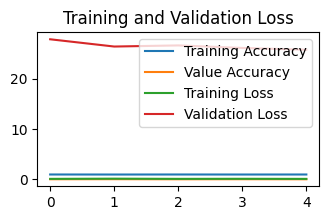

In [105]:
plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 2)
plt.plot(range(5), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(5), history.history['val_accuracy'], label='Value Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), history.history['loss'], label='Training Loss')
plt.plot(range(5), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [109]:
with open('./datasets/Acyclovir/2.png', 'rb') as image:
    img = image.read()

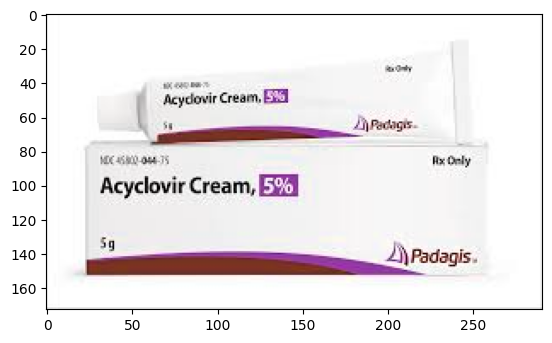

In [110]:
img_arr = np.frombuffer(img, dtype=np.uint8)
cv2_image = cv2.imdecode(img_arr, cv2.IMREAD_COLOR)
plt.imshow(cv2_image, cmap='gray')

In [107]:
def predict_medicine(cv2_image, model, class_names):
    resized_image = cv2.resize(cv2_image, (180, 180))
    plt.imshow(resized_image, cmap='gray')
    normalized_image = resized_image / 255.0
    image_batch = np.expand_dims(normalized_image, axis=0)
    predictions = model.predict(image_batch)
    return class_names[np.argmax(predictions[0])], np.max(predictions[0])

1/1 [==============================] - 0s 30ms/step


('Clopidogrel', 0.80056196)

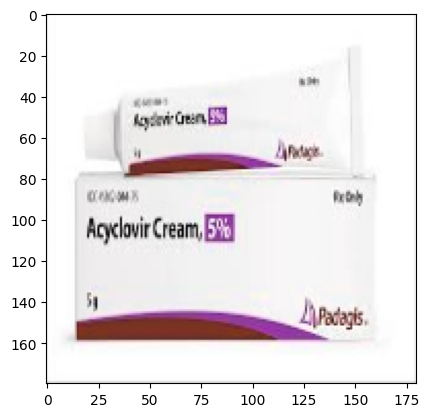

In [111]:
predict_medicine(cv2_image=cv2_image, model=model, class_names=class_names)

In [3]:
data1 = [
    {
        "name" : 'a'
    }, 
    {
        "name" : 'b'
    }
]
data2 = [
    {
        "game" : 'a'
    }, 
    {
        "game" : 'b'
    }
]

{
   "error_message" : "You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account",
   "results" : [],
   "status" : "REQUEST_DENIED"
}
